In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# from imblearn.over_sampling import RandomOverSampler # for add  more of sample if not have 

In [2]:
cols = ["G" , "C" , "B" , "A" , "Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc"] 
# Ia" , "Ib" , "Ic" , "Va" , "Vb" , "Vc is Input : features
# G , C , B , A is OutPut : labels
df = pd.read_csv("../../classData.csv")
cols[4:]



['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

In [3]:
df['fault_type'] = df[['G', 'C', 'B', 'A']].astype(str).agg(''.join, axis=1)
df 

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0000
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0000
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0000
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0000


<ipython-input-4-46f553e16535>:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_faults))


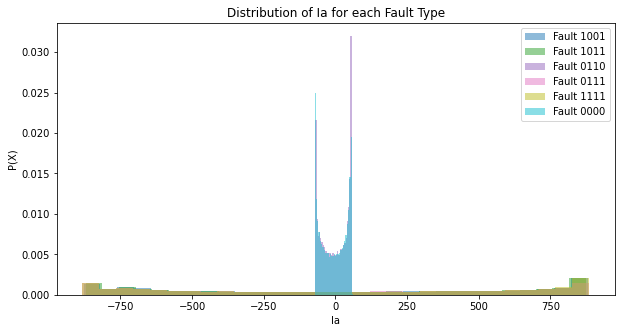

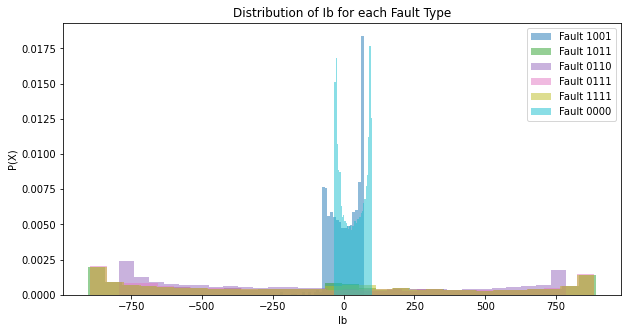

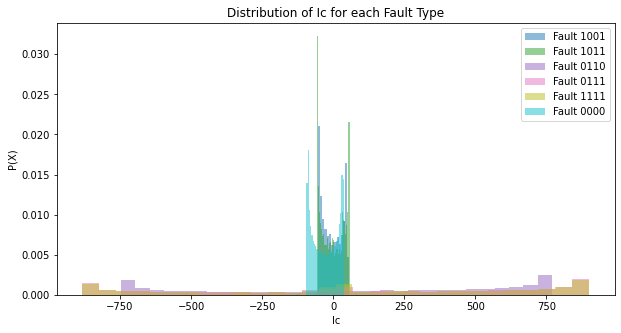

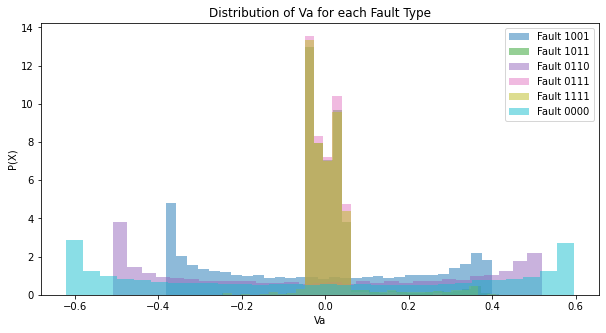

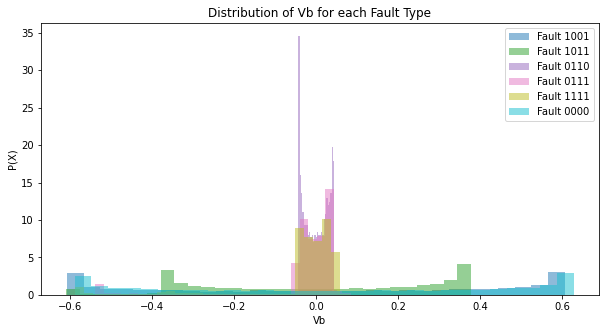

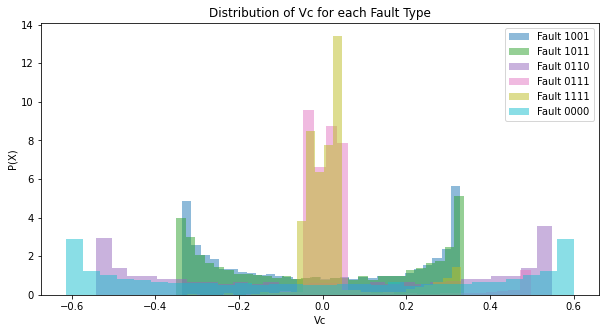

In [4]:
# for label in cols[:-1]:
#     plt.hist(df[df["G"] == 1][label] , color= 'blue' , label="Positive" , alpha = 0.6 , density = True )
#     plt.hist(df[df["G"] == 0][label] , color= 'red' , label="Negative" , alpha = 0.6 , density = True )
#     plt.title(label)
#     plt.ylabel("P(X)")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()
# Combine outputs into one class label like '1001'

input_cols = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']
unique_faults = df['fault_type'].unique()

colors = plt.cm.get_cmap('tab10', len(unique_faults))

for in_col in input_cols:
    plt.figure(figsize=(10, 5))
    for i, fault in enumerate(unique_faults):
        subset = df[df['fault_type'] == fault]
        plt.hist(subset[in_col], bins=30, alpha=0.5, density=True,
                 label=f'Fault {fault}', color=colors(i))
    
    plt.title(f"Distribution of {in_col} for each Fault Type")
    plt.xlabel(in_col)
    plt.ylabel("P(X)")
    plt.legend()

## Train and Validation and Test dataSet

In [5]:
train , valid , test = np.split(df.sample(frac = 1) , [int(0.6 * len(df)) , int(0.8 * len(df))])
# train  60% |||||||||||||
# valid  20%  1234567890
# test 20%
test

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_type
7025,0,0,0,0,-71.391070,69.414289,-1.130350,-0.198078,-0.387921,0.585999,0000
1795,1,0,1,1,781.123178,-68.007976,36.924006,0.034238,-0.367857,0.333619,1011
1104,1,0,0,1,429.735782,-15.861646,44.375039,0.300918,-0.598335,0.297417,1001
2529,0,1,1,0,-66.335280,601.709354,-532.865411,-0.190217,-0.029679,0.219897,0110
2348,0,1,1,0,43.887075,-742.783641,701.547126,0.037620,0.017465,-0.055086,0110
...,...,...,...,...,...,...,...,...,...,...,...
1337,1,0,1,1,786.418178,-747.253286,-12.494244,0.001601,-0.162159,0.160557,1011
2333,0,1,1,0,51.319727,-665.053606,616.425538,0.155395,0.022966,-0.178361,0110
4717,1,1,1,1,-236.037681,855.072349,-619.036514,0.030884,0.009671,-0.040555,1111
6188,0,0,0,0,-58.406553,94.473497,-39.434332,-0.485592,-0.073111,0.558702,0000


In [6]:
def scale_dataset(dataFrame):
    x = dataFrame[['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']].values
    y = dataFrame[['G', 'C', 'B', 'A']].values
    

    scaler = StandardScaler() 
    x = scaler.fit_transform(x)

    data = np.hstack((x, y))
    y = y.dot(np.array([8, 4, 2, 1]))
    return data , x, y

In [7]:
# print(len(train[train["G"] == 1] ))
# print(len(train[train["G"] == 0] ))
train , X_train , Y_train = scale_dataset(train)
valid , X_valid , Y_valid = scale_dataset(valid)
test , X_test , Y_test = scale_dataset(test)

test

array([[-0.17815756,  0.29280314, -0.1398503 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.68208735, -0.02059384, -0.03775408, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.9153358 ,  0.09832795, -0.01776367, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.53742783,  2.08452779, -1.79763376, ...,  1.        ,
         1.        ,  1.        ],
       [-0.14982445,  0.34995166, -0.24261624, ...,  0.        ,
         0.        ,  0.        ],
       [-1.78903553,  0.35846761,  1.77184207, ...,  1.        ,
         1.        ,  1.        ]], shape=(1573, 10))

# Models

## KNN

In [8]:
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.metrics import classification_report

In [9]:
knn_model = KNeighborsClassifier(n_neighbors=5) # how much neghibor that will effect him
knn_model.fit(X_train , Y_train)
 

KNeighborsClassifier()

In [10]:
y_pred = knn_model.predict(X_test)
# valeur null

In [11]:
print(classification_report(Y_test, y_pred ))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       468
           6       0.95      1.00      0.97       204
           7       0.48      0.44      0.46       209
           9       0.94      1.00      0.97       224
          11       0.98      0.94      0.96       234
          15       0.53      0.54      0.53       234

    accuracy                           0.84      1573
   macro avg       0.81      0.82      0.82      1573
weighted avg       0.84      0.84      0.84      1573



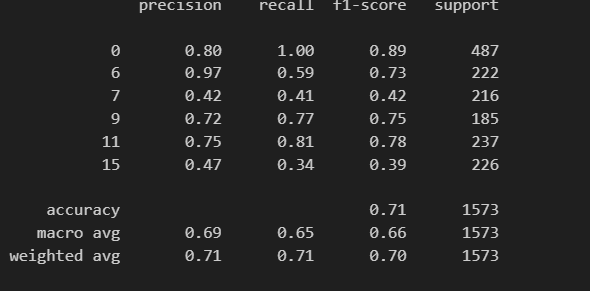

In [12]:
# print(df['G'].value_counts())



To understand this result need to know that is mean Precision and Recall
![alt text](image.png)

## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:

# fault_labels = Y_train.dot(np.array([8, 4, 2, 1]))
# fault_labels_test = Y_test.dot(np.array([8,4,2,1]))

In [15]:
nb_model = GaussianNB() # P(A/B) = (P(A) * P(B/A)) / P(B)
nb_model.fit(X_train , Y_train)

GaussianNB()

In [16]:
y_pred = nb_model.predict(X_test)
y_pred

array([0, 9, 9, ..., 7, 0, 7], shape=(1573,))

In [17]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       468
           6       0.87      0.92      0.90       204
           7       0.45      0.78      0.57       209
           9       0.83      0.92      0.88       224
          11       0.83      0.82      0.82       234
          15       0.59      0.04      0.08       234

    accuracy                           0.78      1573
   macro avg       0.75      0.75      0.70      1573
weighted avg       0.78      0.78      0.74      1573



this worst from the model of KNN 

## Logitic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, Y_train)


In [20]:
y_pred = lr_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(1573,))

In [21]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.32      1.00      0.48       468
           6       0.00      0.00      0.00       204
           7       0.00      0.00      0.00       209
           9       0.00      0.00      0.00       224
          11       0.00      0.00      0.00       234
          15       0.36      0.16      0.22       234

    accuracy                           0.32      1573
   macro avg       0.11      0.19      0.12      1573
weighted avg       0.15      0.32      0.18      1573



c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

## DecisionTreeClassifier


In [22]:
from sklearn.tree import DecisionTreeClassifier ,plot_tree


In [23]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(X_train, Y_train)
y_pred = dt_model.predict(X_test)
y_pred

array([11, 15,  9, ..., 15,  6,  7], shape=(1573,))

In [24]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.56      0.69       468
           6       0.42      0.96      0.58       204
           7       0.47      0.57      0.52       209
           9       0.96      0.59      0.73       224
          11       0.59      0.62      0.60       234
          15       0.32      0.25      0.28       234

    accuracy                           0.58      1573
   macro avg       0.61      0.59      0.57      1573
weighted avg       0.66      0.58      0.59      1573



[Text(0.5225269794045319, 0.9938271604938271, 'x[2] <= 0.079\ngini = 0.811\nsamples = 4716\nvalue = [1424.0, 595.0, 652.0, 682.0, 684.0, 679.0]'),
 Text(0.21012647110486563, 0.9814814814814815, 'x[2] <= -0.35\ngini = 0.762\nsamples = 3687\nvalue = [1424.0, 250.0, 314.0, 681.0, 684.0, 334.0]'),
 Text(0.3663267252546987, 0.9876543209876543, 'True  '),
 Text(0.0821183910064992, 0.9691358024691358, 'x[3] <= 0.2\ngini = 0.668\nsamples = 675\nvalue = [0, 222, 231, 1, 0, 221]'),
 Text(0.0708765150184437, 0.9567901234567902, 'x[3] <= 0.05\ngini = 0.621\nsamples = 538\nvalue = [0, 86, 231, 0, 0, 221]'),
 Text(0.06525557702441595, 0.9444444444444444, 'gini = 0.0\nsamples = 80\nvalue = [0, 80, 0, 0, 0, 0]'),
 Text(0.07649745301247146, 0.9444444444444444, 'x[1] <= 2.085\ngini = 0.513\nsamples = 458\nvalue = [0, 6, 231, 0, 0, 221]'),
 Text(0.0708765150184437, 0.9320987654320988, 'x[5] <= -0.171\ngini = 0.513\nsamples = 452\nvalue = [0, 6, 225, 0, 0, 221]'),
 Text(0.06525557702441595, 0.919753086419

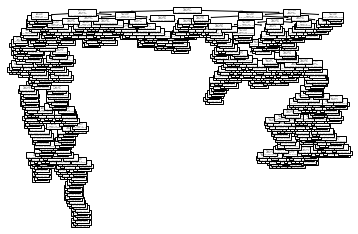

In [25]:
plot_tree(dt_model)


## RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier() #if i did this will be bad 
#n_estimators=100, max_depth=2,random_state=0
rf_model = rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)
y_pred

array([ 0, 11,  9, ...,  7,  6,  7], shape=(1573,))

In [28]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       468
           6       0.72      0.98      0.83       204
           7       0.50      0.51      0.51       209
           9       1.00      0.79      0.89       224
          11       0.81      0.83      0.82       234
          15       0.44      0.41      0.42       234

    accuracy                           0.77      1573
   macro avg       0.74      0.74      0.73      1573
weighted avg       0.77      0.77      0.77      1573



## SVC (Support Vector Classifier)

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC(kernel='linear')
svm_model = svm_model.fit(X_train, Y_train)
y_pred = svm_model.predict(X_test)
y_pred

array([ 0, 11, 15, ...,  0,  0, 15], shape=(1573,))

In [31]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       468
           6       0.89      0.28      0.43       204
           7       0.11      0.03      0.05       209
           9       0.57      0.17      0.26       224
          11       0.26      0.23      0.24       234
          15       0.36      0.40      0.38       234

    accuracy                           0.46      1573
   macro avg       0.45      0.35      0.34      1573
weighted avg       0.45      0.46      0.39      1573



### using others kernels to get better score

In [32]:
from sklearn.svm import SVC

# Use RBF kernel
svm_model = SVC(kernel='rbf')
svm_model = svm_model.fit(X_train, Y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       468
           6       1.00      0.84      0.91       204
           7       0.53      0.27      0.36       209
           9       0.90      0.93      0.91       224
          11       0.92      0.93      0.93       234
          15       0.51      0.68      0.58       234

    accuracy                           0.82      1573
   macro avg       0.79      0.78      0.77      1573
weighted avg       0.81      0.82      0.81      1573



#### Highlights:
- Class 0, 9, 11: Excellent performance (f1-scores around 0.9+).

- Class 6: Much better than before (f1-score up to 0.87 from 0.56).

- Class 15: Still needs work (f1-score ~0.49, but recall improved).

- Class 7: The lowest performer (f1-score ~0.40), possibly due to overlap or low feature separability

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, Y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   1.3s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END ......................C=0.1, gamma=0.01

In [34]:
y_pred

array([ 0, 15,  9, ...,  7,  0, 15], shape=(1573,))

In [35]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       468
           6       0.89      1.00      0.94       204
           7       0.50      0.33      0.40       209
           9       0.97      0.97      0.97       224
          11       1.00      0.82      0.90       234
          15       0.49      0.71      0.58       234

    accuracy                           0.82      1573
   macro avg       0.81      0.80      0.79      1573
weighted avg       0.83      0.82      0.82      1573



In [36]:
print("Best Parameters:", grid.best_params_)


Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}


In [37]:
# from sklearn import datasets
# from mlxtend.plotting import plot_decision_regions

# # Only works for 2D data, so reduce dimensions if needed
# X = X_train[:, :2]  # Or use PCA if needed
# y = Y_train

# svm_model = SVC(kernel='rbf', C=10, gamma=0.01)
# svm_model.fit(X, y)

# plt.figure(figsize=(10, 6))
# plot_decision_regions(X, y, clf=svm_model, legend=2)
# plt.title('SVC Decision Boundary with RBF Kernel')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()

## SGDClassifier

In [38]:
from sklearn.linear_model import SGDClassifier

In [39]:
sdg_model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sdg_model.fit(X_train, Y_train)
# Make predictions
y_pred = svm_model.predict(X_test)

print(classification_report(Y_test, y_pred))

c:\Users\OussamaTab\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       468
           6       1.00      0.84      0.91       204
           7       0.53      0.27      0.36       209
           9       0.90      0.93      0.91       224
          11       0.92      0.93      0.93       234
          15       0.51      0.68      0.58       234

    accuracy                           0.82      1573
   macro avg       0.79      0.78      0.77      1573
weighted avg       0.81      0.82      0.81      1573



In [40]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train, Y_train)
y_pred = model.predict(X)

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [42]:
from sklearn.multioutput import ClassifierChain

model = ClassifierChain(RandomForestClassifier())
model.fit(X_train, Y_train)


IndexError: tuple index out of range

In [ ]:
from xgboost import XGBClassifier



In [ ]:

XG_model = XGBClassifier()
# XG_model.fit(X_train, Y_train)
# predictions = XG_model.predict(X_test)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5], got [ 0  6  7  9 11 15]